In [10]:
# import libraries

import numpy as np
import pandas as pd

# visual
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# read csv files

train = pd.read_csv('./datasets/train_clean.csv')
test = pd.read_csv('./datasets/test_clean.csv')


### 1. Feature Engineering

#### 1a. Creating new derived features

From the EDA, we aware that there is high positve correlation between the variable `saleprice` and `overall_qual` and `gr_liv_area` respectively. Due to the impact of these features are significant to predict the sale price, so we create polynomial features for these features.

In [12]:
# To create a features which the values are combination of the 2 important variables

for f in ["overall_qual", "gr_liv_area"]:
    train[f + "_p2"] = train[f] ** 2
    train[f + "_p3"] = train[f] ** 3
    train["overallqual_grlivarea"] = train["overall_qual"] * train["gr_liv_area"]
    
for f in ["overall_qual", "gr_liv_area"]:
    test[f + "_p2"] = test[f] ** 2
    test[f + "_p3"] = test[f] ** 3
    test["overallqual_grlivarea"] = test["overall_qual"] * test["gr_liv_area"]
    

Also, we will remove one feature from those predictor features that are highly pair correlated to avoid multicollinearity problem. From the EDA, we have 3 pairs:
* `garage_cars` vs `garage_area` - suggest to remove `garage_cars`
* `gr_liv_area` vs `totrms_abvgrd`- suggest to remove `totrms_abvgrd`
* `1st_flr_sf` vs `total_bsmt_sf`- suggest to remove `1st_flr_sf`

In [13]:
# To drop one of the feature for higly pair correlated features

train.drop(["garage_cars", "totrms_abvgrd","1st_flr_sf"], axis=1, inplace=True)
test.drop(["garage_cars", "totrms_abvgrd","1st_flr_sf"], axis=1, inplace=True)


#### 1b. Dealing with Ordinal Variables

#### Split the types variables for encoding purposes

In [14]:
# Create mask for numeric and categorical features

numerical_data = train.select_dtypes("number")
category_data = train.select_dtypes(object)

In [15]:
cat = list(category_data)
print(cat)

# There are nominal and ordinary types of features, will refer this to the documentation by Dean De Cock

['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc', 'central_air', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature', 'sale_type']


In [16]:
## garage_area should be numerical data
train['garage_area'] = train['garage_area'].astype('float64')

In [17]:
num = list (numerical_data)
print(num)

# Some of the features should be treated as categorical variables, will dummify them later

['Unnamed: 0', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'fireplaces', 'garage_yr_blt', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice', 'overall_qual_p2', 'overall_qual_p3', 'overallqual_grlivarea', 'gr_liv_area_p2', 'gr_liv_area_p3']


#### Label Encoding for Ordinary Features

Apply lable encoding for ordinary features due to machine learning models will not know that this feature represents a ranking; it will be treated as other categorical features. To avoid this, we will map each one using LabelEncoder from sklearn.

In [18]:
# Import label encoder 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Encode labels the ordinary features
# the ordinary features are referred to the documentation by De Cock （2011）

ord_fea = ['lot_shape','utilities','land_slope','exter_qual','exter_cond','bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical','kitchen_qual','functional',
 'fireplace_qu', 'garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence']

train[ord_fea]= train[ord_fea].apply(LabelEncoder().fit_transform)
test[ord_fea]= train[ord_fea].apply(LabelEncoder().fit_transform)

train.head()


# 'overall_qual' and 'overall_cond' are ordinal features but excluded due to these already labelled in rates. 

,Unnamed: 0,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,misc_val,mo_sold,yr_sold,sale_type,saleprice,overall_qual_p2,overall_qual_p3,overallqual_grlivarea,gr_liv_area_p2,gr_liv_area_p3
0,0,60,rl,0.0,13517,pave,None,0,lvl,0,...,0,3,2010,wd,130500,36,216,8874,2187441,3235225239
1,1,60,rl,43.0,11492,pave,None,0,lvl,0,...,0,4,2009,wd,220000,49,343,14854,4502884,9555119848
2,2,20,rl,68.0,7922,pave,None,3,lvl,0,...,0,1,2010,wd,109000,25,125,5285,1117249,1180932193
3,3,60,rl,73.0,9802,pave,None,3,lvl,0,...,0,4,2010,wd,174000,25,125,7220,2085136,3010936384
4,4,50,rl,82.0,14235,pave,None,0,lvl,0,...,0,3,2010,wd,138500,36,216,8670,2088025,3017196125


In [19]:

test.head()

,Unnamed: 0,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,misc_feature,misc_val,mo_sold,yr_sold,sale_type,overall_qual_p2,overall_qual_p3,overallqual_grlivarea,gr_liv_area_p2,gr_liv_area_p3
0,0,190,rm,69.0,9142,pave,grvl,0,lvl,0,...,None,0,4,2006,wd,36,216,11568,3717184,7166730752
1,1,90,rl,0.0,9662,pave,None,0,lvl,0,...,None,0,8,2006,wd,25,125,9835,3869089,7610498063
2,2,60,rl,58.0,17104,pave,None,3,lvl,0,...,None,0,9,2006,new,49,343,10472,2238016,3348071936
3,3,30,rm,60.0,8520,pave,None,3,lvl,0,...,None,0,7,2007,wd,25,125,4840,937024,907039232
4,4,20,rl,0.0,9500,pave,None,0,lvl,0,...,None,0,7,2009,wd,36,216,8364,1943236,2708870984


#### One-Hot Encoding for Nominal Features

In [20]:
# to obtain the list of nominal features

nom_fea = []

for cols in cat:
     if cols not in ord_fea:
             nom_fea.append(cols)
                
print(nom_fea)  

['ms_zoning', 'street', 'alley', 'land_contour', 'lot_config', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 'central_air', 'garage_type', 'misc_feature', 'sale_type']


In [21]:
# One-hot encoding for nominal features

train = pd.get_dummies(data=train, columns=nom_fea)
test = pd.get_dummies(data=test, columns=nom_fea)

In [22]:
train.head()

,Unnamed: 0,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,...,misc_feature_tenc,sale_type_cod,sale_type_con,sale_type_conld,sale_type_conli,sale_type_conlw,sale_type_cwd,sale_type_new,sale_type_oth,sale_type_wd
0,0,60,0.0,13517,0,0,0,6,8,1976,...,0,0,0,0,0,0,0,0,0,1
1,1,60,43.0,11492,0,0,0,7,5,1996,...,0,0,0,0,0,0,0,0,0,1
2,2,20,68.0,7922,3,0,0,5,7,1953,...,0,0,0,0,0,0,0,0,0,1
3,3,60,73.0,9802,3,0,0,5,5,2006,...,0,0,0,0,0,0,0,0,0,1
4,4,50,82.0,14235,0,0,0,6,8,1900,...,0,0,0,0,0,0,0,0,0,1


In [23]:
test.head()

,Unnamed: 0,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,...,sale_type_cod,sale_type_con,sale_type_conld,sale_type_conli,sale_type_conlw,sale_type_cwd,sale_type_new,sale_type_oth,sale_type_vwd,sale_type_wd
0,0,190,69.0,9142,0,0,0,6,8,1910,...,0,0,0,0,0,0,0,0,0,1
1,1,90,0.0,9662,0,0,0,5,4,1977,...,0,0,0,0,0,0,0,0,0,1
2,2,60,58.0,17104,3,0,0,7,5,2006,...,0,0,0,0,0,0,1,0,0,0
3,3,30,60.0,8520,3,0,0,5,6,1923,...,0,0,0,0,0,0,0,0,0,1
4,4,20,0.0,9500,0,0,0,6,5,1963,...,0,0,0,0,0,0,0,0,0,1


#### Convert numerical Features to categorical features

`ms_subcalss` should be a categorical variable instead of a numerical variable, so we dummify it also

In [24]:
train['ms_subclass'] = train['ms_subclass'].astype('category')
test['ms_subclass'] = test['ms_subclass'].astype('category')

In [25]:
train.shape

(2049, 220)

In [26]:
test.shape

(876, 211)

After dummfying the features, we now have 2049 observations and 217 features.

#### Correlation Heatmap of Sales Price and Variables

<AxesSubplot:>

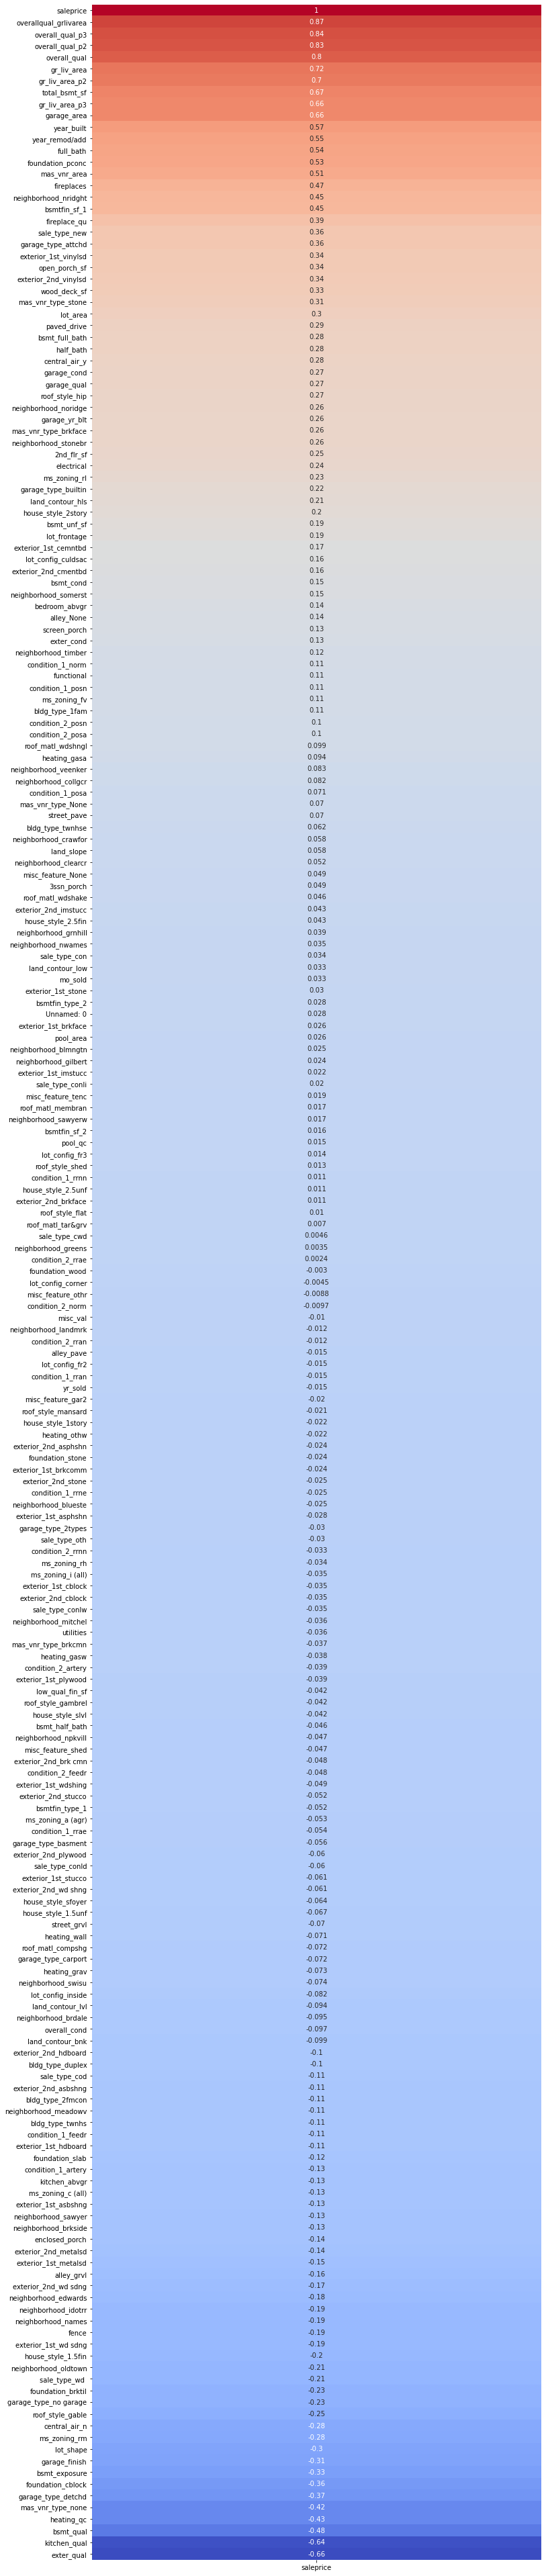

In [27]:
# Check correlation for all variables
plt.figure(figsize=(12,70))
sns.heatmap(train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False), cmap='coolwarm', annot=True, cbar=False)

In [28]:
# Top 20 most postively correlated features

df_corr = train.corr()
print(df_corr.shape)
df_corr['saleprice'].sort_values(ascending=False).head(21)

## excluding sale price

(219, 219)


saleprice                1.000000
overallqual_grlivarea    0.872971
overall_qual_p3          0.839437
overall_qual_p2          0.830575
overall_qual             0.803462
gr_liv_area              0.719463
gr_liv_area_p2           0.702059
total_bsmt_sf            0.665116
gr_liv_area_p3           0.655460
garage_area              0.655097
year_built               0.572405
year_remod/add           0.550872
full_bath                0.538225
foundation_pconc         0.529500
mas_vnr_area             0.511273
fireplaces               0.473783
neighborhood_nridght     0.448639
bsmtfin_sf_1             0.446103
fireplace_qu             0.389803
sale_type_new            0.360599
garage_type_attchd       0.358104
Name: saleprice, dtype: float64

In [29]:
# Our top 10 most negatively correlated features

df_corr = train.corr()
print(df_corr.shape)
df_corr['saleprice'].sort_values(ascending=True).head(10)

(219, 219)


exter_qual           -0.662374
kitchen_qual         -0.636901
bsmt_qual            -0.482095
heating_qc           -0.425175
mas_vnr_type_none    -0.424540
garage_type_detchd   -0.370485
foundation_cblock    -0.355768
bsmt_exposure        -0.326625
garage_finish        -0.308987
lot_shape            -0.299875
Name: saleprice, dtype: float64

#### To check the multicollinearity between the features

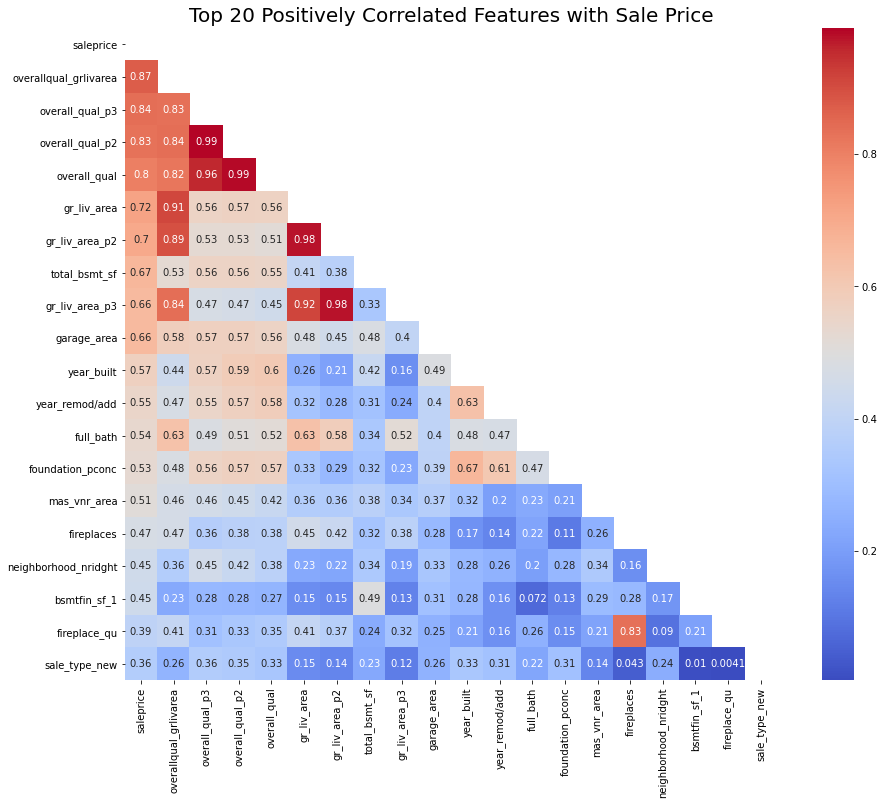

In [30]:
# Create mask for our top twenty positively correlated features
top_corr = train.corr()['saleprice'].sort_values(ascending=False).head(20).index

#Plot heatmap of top twenty positively correlated features.
plt.figure(figsize=(16,12))
mask = np.triu(np.ones_like(train[top_corr].corr(), dtype=bool))
ax = sns.heatmap(train[top_corr].corr(), cmap='coolwarm', mask=mask, square=True, annot=True)
plt.title('Top 20 Positively Correlated Features with Sale Price', fontsize=20);

Base on heatmap above, there are some features like `totrms_abvgrd` and `gr_liv_area` generally have a <b>high level of multicollinearity</b>. There are also variables that have a high degree of pairwise correlation e.g. `1st_flr_sf` and `total_bsmt_sf`, as well as `garage_car` and `garage_area`, etc.

High multicollinearity between the features might reduce the precision of estimate coefficients and weaken the statistical power of the predictive model. So will use remove redundant features and decease multicollinearity in the next.

In [31]:
# Save encoded train and test data
train.to_csv('./datasets/train_encoded.csv', index=False)
test.to_csv('./datasets/test_encoded.csv', index=False)